# Neural network training voodoos

## train a network vanillaly

In [1]:
from neural_verification import MLP
import torch
import numpy as np
import copy

seed = 0
torch.manual_seed(seed)
np.random.seed(seed)

width = 40
seed = 0
n_digit = 2 # how many digits are multiplied

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"

xs = np.random.rand(1000,n_digit) * 4 - 2
ys = copy.deepcopy(xs[:,0])
for i in range(n_digit-1):
    ys *= xs[:,i+1]

# For simplicity I don't have a test set here. Conventionally one should have a test set.
inputs = torch.tensor(xs, dtype=torch.float).requires_grad_(True).to(device)
labels = torch.tensor(ys, dtype=torch.float).requires_grad_(True).unsqueeze(dim=1).to(device)

# Set the input size, hidden layer sizes, and output size
input_size = n_digit
hidden_sizes = [width]
output_size = 1

# Create an instance of the fully-connected network
net = MLP(in_dim=n_digit, out_dim=1, width=50, depth=2).to(device)

lr = 1e-2
opt = torch.optim.Adam(net.parameters(), lr=lr)

training_steps = 100001 #50000
log_freq = 10000
losses = []

for i in range(training_steps):

    opt.zero_grad()

    outputs = net(inputs)

    loss = torch.mean((outputs-labels)**2)
    loss.backward()
    losses.append(loss.item())

    opt.step()

    if i % log_freq == 0:
        print("step = %d | loss = %.8f"%(i, loss.item()))


step = 0 | loss = 1.87538254
step = 10000 | loss = 0.00000477
step = 20000 | loss = 0.00000116
step = 30000 | loss = 0.00000097
step = 40000 | loss = 0.00000232
step = 50000 | loss = 0.00041158
step = 60000 | loss = 0.00000027
step = 70000 | loss = 0.00006503
step = 80000 | loss = 0.00000951
step = 90000 | loss = 0.00000031
step = 100000 | loss = 0.00000026


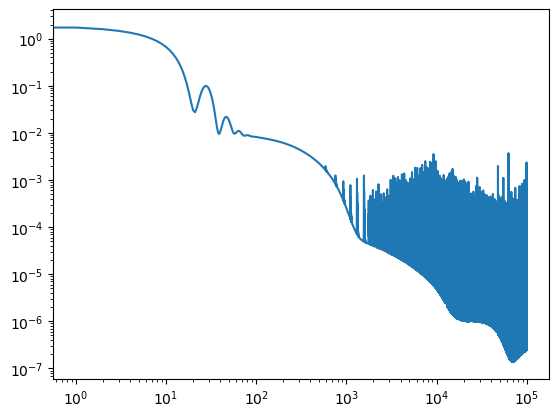

In [2]:
import matplotlib.pyplot as plt

plt.plot(np.arange(training_steps,), losses)
plt.xscale('log')
plt.yscale('log')


## try decreasing learning rate once in a while

In [3]:
from neural_verification import MLP
import torch
import numpy as np
import copy

seed = 0
torch.manual_seed(seed)
np.random.seed(seed)

width = 40
seed = 0
n_digit = 2 # how many digits are multiplied

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"

xs = np.random.rand(1000,n_digit) * 4 - 2
ys = copy.deepcopy(xs[:,0])
for i in range(n_digit-1):
    ys *= xs[:,i+1]

# For simplicity I don't have a test set here. Conventionally one should have a test set.
inputs = torch.tensor(xs, dtype=torch.float).requires_grad_(True).to(device)
labels = torch.tensor(ys, dtype=torch.float).requires_grad_(True).unsqueeze(dim=1).to(device)

# Set the input size, hidden layer sizes, and output size
input_size = n_digit
hidden_sizes = [width]
output_size = 1

# Create an instance of the fully-connected network
net = MLP(in_dim=n_digit, out_dim=1, width=50, depth=2).to(device)

lr = 1e-2
opt = torch.optim.Adam(net.parameters(), lr=lr)

training_steps = 100001 #50000
log_freq = 10000
losses = []

for i in range(training_steps):

    # decrese learning rate every once a while
    if (i+1) % 20000 == 0:
        for g in opt.param_groups:
            g['lr'] *= 0.1

    opt.zero_grad()

    outputs = net(inputs)

    loss = torch.mean((outputs-labels)**2)
    loss.backward()
    losses.append(loss.item())

    opt.step()

    if i % log_freq == 0:
        print("step = %d | loss = %.8f"%(i, loss.item()))


step = 0 | loss = 1.87538254
step = 10000 | loss = 0.00000477
step = 20000 | loss = 0.00000104
step = 30000 | loss = 0.00000069
step = 40000 | loss = 0.00000184
step = 50000 | loss = 0.00000038
step = 60000 | loss = 0.00000031
step = 70000 | loss = 0.00000027
step = 80000 | loss = 0.00000023
step = 90000 | loss = 0.00000021
step = 100000 | loss = 0.00000020


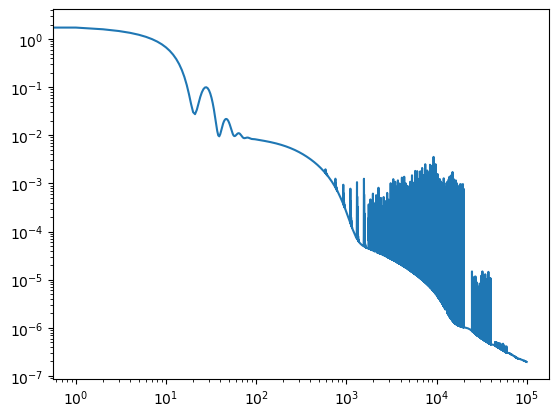

In [4]:
import matplotlib.pyplot as plt

plt.plot(np.arange(training_steps,), losses)
plt.xscale('log')
plt.yscale('log')


## try optimizing log(loss) instead of loss

In [5]:
from neural_verification import MLP
import torch
import numpy as np
import copy

seed = 0
torch.manual_seed(seed)
np.random.seed(seed)

width = 40
seed = 0
n_digit = 2 # how many digits are multiplied

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"

xs = np.random.rand(1000,n_digit) * 4 - 2
ys = copy.deepcopy(xs[:,0])
for i in range(n_digit-1):
    ys *= xs[:,i+1]

# For simplicity I don't have a test set here. Conventionally one should have a test set.
inputs = torch.tensor(xs, dtype=torch.float).requires_grad_(True).to(device)
labels = torch.tensor(ys, dtype=torch.float).requires_grad_(True).unsqueeze(dim=1).to(device)

# Set the input size, hidden layer sizes, and output size
input_size = n_digit
hidden_sizes = [width]
output_size = 1

# Create an instance of the fully-connected network
net = MLP(in_dim=n_digit, out_dim=1, width=50, depth=2).to(device)

lr = 1e-2
opt = torch.optim.Adam(net.parameters(), lr=lr)

training_steps = 100001 #50000
log_freq = 10000
losses = []

for i in range(training_steps):

    # decrese learning rate every once a while
    if (i+1) % 20000 == 0:
        for g in opt.param_groups:
            g['lr'] *= 0.1

    opt.zero_grad()

    outputs = net(inputs)

    loss = torch.mean((outputs-labels)**2)
    torch.log(loss).backward()
    losses.append(loss.item())

    opt.step()

    if i % log_freq == 0:
        print("step = %d | loss = %.8f"%(i, loss.item()))


step = 0 | loss = 1.87538254
step = 10000 | loss = 0.00041459
step = 20000 | loss = 0.00008643
step = 30000 | loss = 0.00000081
step = 40000 | loss = 0.00000056
step = 50000 | loss = 0.00000039
step = 60000 | loss = 0.00000031
step = 70000 | loss = 0.00000028
step = 80000 | loss = 0.00000024
step = 90000 | loss = 0.00000022
step = 100000 | loss = 0.00000020


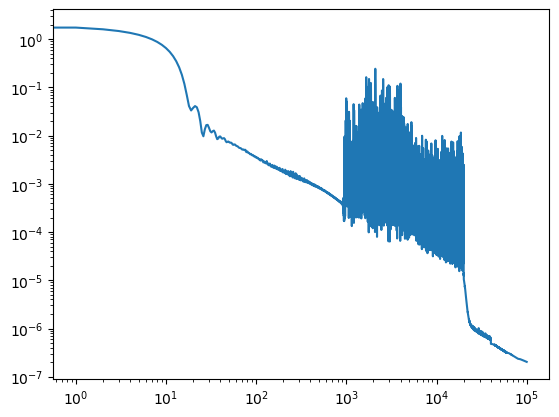

In [6]:
import matplotlib.pyplot as plt

plt.plot(np.arange(training_steps,), losses)
plt.xscale('log')
plt.yscale('log')

# try changing the eps parameter in Adam 
(larger eps, Adam behaves more like SGD hence loss drops slowly; smaller eps, loss drops faster but becomes more unstable for low losses.)

In [9]:
from neural_verification import MLP
import torch
import numpy as np
import copy

seed = 0
torch.manual_seed(seed)
np.random.seed(seed)

width = 40
seed = 0
n_digit = 2 # how many digits are multiplied

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"

xs = np.random.rand(1000,n_digit) * 4 - 2
ys = copy.deepcopy(xs[:,0])
for i in range(n_digit-1):
    ys *= xs[:,i+1]

# For simplicity I don't have a test set here. Conventionally one should have a test set.
inputs = torch.tensor(xs, dtype=torch.float).requires_grad_(True).to(device)
labels = torch.tensor(ys, dtype=torch.float).requires_grad_(True).unsqueeze(dim=1).to(device)

# Set the input size, hidden layer sizes, and output size
input_size = n_digit
hidden_sizes = [width]
output_size = 1

# Create an instance of the fully-connected network
net = MLP(in_dim=n_digit, out_dim=1, width=50, depth=2).to(device)

lr = 1e-2
opt = torch.optim.Adam(net.parameters(), lr=lr, eps=1e-4)

training_steps = 100001 #50000
log_freq = 10000
losses = []

for i in range(training_steps):

    # decrese learning rate every once a while
    if (i+1) % 20000 == 0:
        for g in opt.param_groups:
            g['lr'] *= 0.1

    opt.zero_grad()

    outputs = net(inputs)

    loss = torch.mean((outputs-labels)**2)
    loss.backward()
    losses.append(loss.item())

    opt.step()

    if i % log_freq == 0:
        print("step = %d | loss = %.8f"%(i, loss.item()))


step = 0 | loss = 1.87538254
step = 10000 | loss = 0.00000738
step = 20000 | loss = 0.00000157
step = 30000 | loss = 0.00000081
step = 40000 | loss = 0.00000057
step = 50000 | loss = 0.00000053
step = 60000 | loss = 0.00000050
step = 70000 | loss = 0.00000050
step = 80000 | loss = 0.00000050
step = 90000 | loss = 0.00000050
step = 100000 | loss = 0.00000050


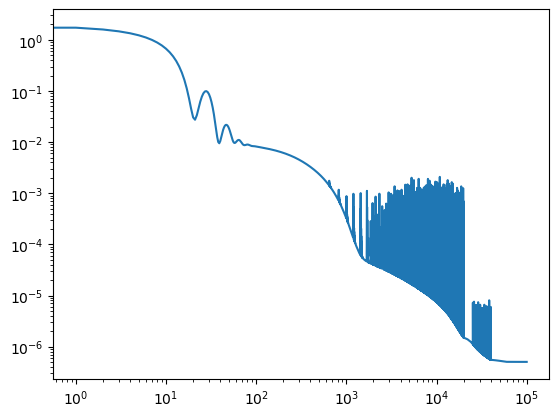

In [11]:
import matplotlib.pyplot as plt

plt.plot(np.arange(training_steps,), losses)
plt.xscale('log')
plt.yscale('log')